In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.signal import find_peaks

In [3]:
def cal_polyfit(data, segments):
    #Polyfit of 2 segments
    #101-300,310-700
    polyfit1 = np.polyfit(data[segments[0][0]:segments[0][1],0],data[segments[0][0]:segments[0][1],1],20)
    poly1 = np.poly1d(polyfit1)
    x1 = np.linspace(data[segments[0][0],0],data[segments[0][1],0],100)
    y1 = poly1(x1)
    
    polyfit2 = np.polyfit(data[segments[1][0]:segments[1][1],0],data[segments[1][0]:segments[1][1],1],30)
    poly2 = np.poly1d(polyfit2)
    x2 = np.linspace(data[segments[1][0],0],data[segments[1][1],0],200)
    y2 = poly2(x2)
    
    #plot polyfit construction
    x = np.concatenate((x1,x2))
    y = np.concatenate((y1,y2))
    polyfit_data = np.hstack((np.array([x]).T,np.array([y]).T))
    return polyfit_data

In [4]:
def find_derivative(data, segments, findpeaks=False):
    #find Vc and imprint derivative
    
    x1 = data[segments[0][0]:segments[0][1],0]
    y1 = data[segments[0][0]:segments[0][1],1]
    x2 = data[segments[1][0]:segments[1][1],0]
    y2 = data[segments[1][0]:segments[1][1],1]    
    
    #polyfit derivative
    voltage_diff1 = np.diff(x1)
    charge_diff1 = np.diff(y1)
    data_diff1 = charge_diff1/voltage_diff1
    voltage_diff2 = np.diff(x2)
    charge_diff2 = np.diff(y2)
    data_diff2 = charge_diff2/voltage_diff2

    x1 = x1[:-1]+voltage_diff1[0]/2.0
    x2 = x2[:-1]+voltage_diff2[0]/2.0
    
    Vc1 = x1[np.argmax(data_diff1)]
    Vc2 = x2[np.argmax(data_diff2)]
    Vc = (Vc1-Vc2)/2.0
    Imprint = (Vc1+Vc2)/2.0
    print ("Vc is ",Vc)
    print ("Imprint is ",Imprint)
    
    x = np.concatenate((x1,x2))
    y = np.concatenate((data_diff1,data_diff2))    
    
    if findpeaks:
        peaks = find_peaks(y,height=10)
        print ("Peaks found are at ",x[peaks[0]]," with the following values ",y[peaks[0]])
          
    return np.hstack((np.array([x]).T,np.array([y]).T))

In [5]:
def plot_data(data,flag,filestring):
    labels = ["Data","Fit"] #change this
    
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
   
    fz = 40
    figSize = (10,10)
    width = 3
    ylimits = [-40,40]
    plt.figure(dpi=1000)
    colors = [(3, 72, 161),(195, 18, 30),(255, 176, 28),(2, 118, 8),(1, 147, 176),(156, 83, 0),(148, 156, 1),(113, 4, 181)]
    colors = [tuple(t/255.0 for t in tupl) for tupl in colors]
    markers = ['-','--',':','-.',]

    #plot data
    fig, ax = plt.subplots(figsize=figSize)
    if data.ndim == 2:
        ax.plot(data[:,0],data[:,1],color=colors[0],linewidth=width,alpha=0.7)
    else:
        for i in range(len(data)):
            ax.plot(data[i][:,0],data[i][:,1],color=colors[i],linestyle=markers[i],linewidth=width+i,alpha=0.7,label=labels[i])
    plt.xlabel('Voltage (V)', fontsize=fz)
    if flag == "PV":
        plt.ylabel(r'P $\mu$C/cm$^2$', fontsize=fz)
        plt.ylim(ylimits)
    else:
        plt.ylabel(r'I $\mu$A/cm$^2$', fontsize=fz)
        plt.ylim(bottom=0)
    plt.xticks(fontsize=fz)
    plt.yticks(fontsize=fz)
    plt.xlim([-3.5,3.5])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    ax.tick_params(axis="both",direction="in",length=fz/2,width=width,pad=15,top=True,right=True)
    [x.set_linewidth(width) for x in ax.spines.values()] #border width
    plt.tight_layout()
    plt.legend(loc="upper left",fontsize=fz,frameon=False)
    plt.savefig(filestring+"_"+flag+'.png')
    #pd.DataFrame(data).to_csv(filestring+'_'+flag+'.csv')
    plt.show()

    return

Pr is 17.972999999999992
Vc through intercept is 1.1552
Imprint through intercept is 0.0918000000000001
Raw derivative:
Vc is  1.121178625
Imprint is  0.15294592500000004
Derivative of polyfit:
Vc is  1.10862435540201
Imprint is  0.08444219459799007
Peaks found are at  [ 1.19306655  2.19683025 -1.02418216]  with the following values  [25.21008456 15.92881607 23.69264392]


C:\Users\khman\AppData\Local\Temp/ipykernel_13864/1187103073.py:38: RankWarning: Polyfit may be poorly conditioned
  polyfit = cal_polyfit(data,segments1)
C:\Users\khman\AppData\Local\Temp/ipykernel_13864/1187103073.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_data(np.array(data),"PV",filestring)


<Figure size 6000x4000 with 0 Axes>

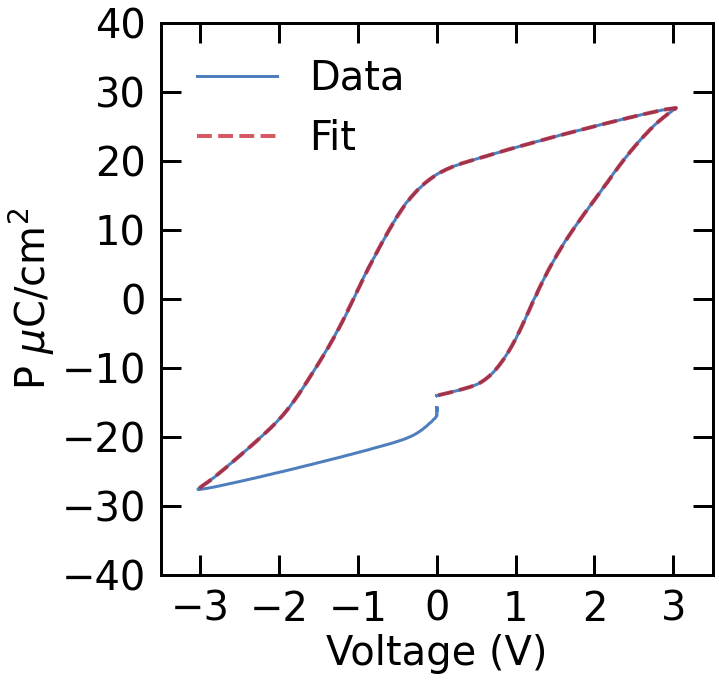

C:\Users\khman\AppData\Local\Temp/ipykernel_13864/1187103073.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_data(np.array(derivative),"diff",filestring)


<Figure size 6000x4000 with 0 Axes>

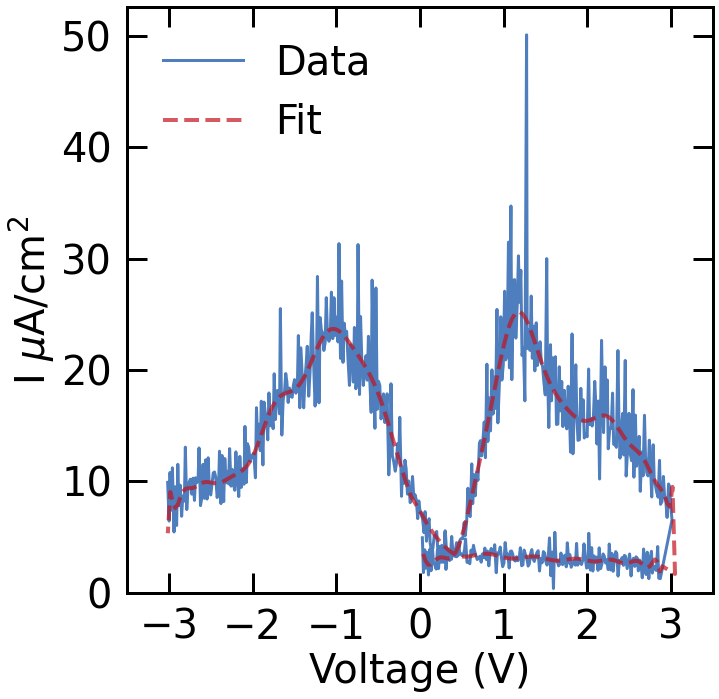

In [11]:
#read file
folder = 'Manohar/20220315/KHM006_23/'
filename = 'KHM006_23_PV_20um_O_2D'
sheetname = 'Append2'
filestring = folder+filename+"_"+sheetname

devicelength = 20 #um
#df = pd.read_excel(folder+filename+'.xls', sheet_name=sheetname, usecols=['Vforce','Charge'])
df = pd.read_csv(folder+filename+'.csv')
data = np.array(df)

# normalize data
data[:,1] = data[:,1]/devicelength**2*10**14 #um to cm

#shift data
maximum = np.amax(data,axis=0)[1]
minimum = np.amin(data,axis=0)[1]
shift = (maximum+minimum)/2.0
data[:,1] = data[:,1] - shift

#find Pr, Vc and imprint
Pr = data[np.argwhere(data[300:,0] < 0)[0]+300,1][0]
Vc_neg = data[np.argwhere(data[300:,1] < 0)[0]+300,0][0]
Vc_pos = data[np.argwhere(data[50:,1] > 0)[0]+50,0][0]
Vc = (Vc_pos-Vc_neg)/2.0
Imprint = (Vc_pos+Vc_neg)/2.0

print ("Pr is "+str(Pr))
print ("Vc through intercept is "+str(Vc))
print ("Imprint through intercept is "+str(Imprint))


#define intervals (in row nos.) for polynomial fitting and derivative
segments1 = [(101,300),(310,700)]
segments2 = [(0,segments1[0][1]-segments1[0][0]),(segments1[0][1]-segments1[0][0]+1,segments1[0][1]-segments1[0][0]+segments1[1][1]-segments1[1][0]+1)]

#polynomial fitting
polyfit = cal_polyfit(data,segments1)

#find derivative of raw and polyfit data
print ("Raw derivative:")
derivative = find_derivative(data,segments1)
print ("Derivative of polyfit:")
polyfit_derivative = find_derivative(polyfit,segments2,True)

data = [data]
data.append(polyfit)

derivative = [derivative]
derivative.append(polyfit_derivative)

#plot data
plot_data(np.array(data),"PV",filestring)
plot_data(np.array(derivative),"diff",filestring)